In [1]:
import regimes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(1)

In [2]:
# Normalization (Standard)
def normalize(data, type='minmax'):

    if type=='std':
        return (np.array(data) - np.mean(data))/np.std(data)
        
    elif type=='minmax':
        return (np.array(data) - np.min(data))/(np.max(data) - np.min(data))

In [3]:
data1=pd.read_csv(r'../datasets/FLX_DE/FLX_DE-Hai_FLUXNET2015_SUBSET_DD_2000-2012_1-4.csv')
TS=data1["TIMESTAMP"]
#TE=data1["TIMESTAMP_END"]
data = data1[["TA_F","NEE_VUT_REF","RECO_NT_VUT_REF","GPP_NT_VUT_REF","RECO_DT_VUT_REF","GPP_DT_VUT_REF"]]   #"TIMESTAMP_START","TIMESTAMP_END"

In [5]:
data=data.apply(normalize)
#data

In [7]:
#data.isnull().sum()

In [8]:
k = 3
winsize = 80
metricE = 'Euclidean'
metricR = 'Riemannian'
clusters, cluster_idx = regimes.get_regimes(data, winsize, k, metricR)

/home/gull/anaconda3/envs/regimesident/lib/python3.11/site-packages/pyriemann/utils/mean.py:522: UserWarning: Convergence not reached
  warnings.warn("Convergence not reached")


In [10]:
clusters_extended = []

for i in range(len(clusters)):

    val = clusters[i]
    for j in range(winsize):
        clusters_extended.append(val)
        
#print(len(clusters_extended), data.shape)

In [13]:
datanew = data.iloc[:len(clusters_extended), :].copy()
#datanew
datanew['Clusters'] = clusters_extended
#datanew.insert(loc=0,column="TIMESTAMP_END",value=TE)
datanew.insert(loc=0,column="TIMESTAMP",value=TS) #_START",value=TS)
datanew

,TIMESTAMP,TA_F,NEE_VUT_REF,RECO_NT_VUT_REF,GPP_NT_VUT_REF,RECO_DT_VUT_REF,GPP_DT_VUT_REF,Clusters
0,20000101,0.382840,0.785715,0.116222,0.102008,0.046246,0.000000,1
1,20000102,0.389205,0.788490,0.118804,0.100631,0.046568,0.000000,1
2,20000103,0.409998,0.789823,0.127744,0.103129,0.047578,0.000000,1
3,20000104,0.434076,0.786074,0.138333,0.110763,0.048722,0.000000,1
4,20000105,0.429138,0.779226,0.135502,0.115613,0.048821,0.000000,1
...,...,...,...,...,...,...,...,...
4715,20121128,0.460826,0.889250,0.351896,0.107823,0.137117,0.007609,0
4716,20121129,0.382681,0.819335,0.298279,0.147189,0.083345,0.002195,0
4717,20121130,0.348706,0.812487,0.258585,0.136916,0.072869,0.001306,0
4718,20121201,0.323337,0.810497,0.225212,0.124970,0.080613,0.005540,0


In [20]:
datanew[[i for i in data.columns] + ['Clusters']].plot()

In [237]:
#generates the data for each year from 2000 to 2012

def yearly_DA(data,year):
    datayear=(data['TIMESTAMP']>= (year*10**4+101)) & (data['TIMESTAMP']<= (year*10**4 + 1231))
    return data[datayear].reset_index(drop=True)

In [238]:
df2006=yearly_DA(datanew,2006)

In [267]:
data_frames=[yearly_DA(datanew,i) for i in range(2000,2012)]

In [309]:
plotdata=[]
for j in range(len(data_frames)):
    plotdata.append([j+2000,
                      list(data_frames[j][data_frames[j]['Clusters'].ne(data_frames[j]['Clusters'].shift())]['Clusters'].items())
                    ])

In [310]:
plotdata

[[2000, [(0, 1), (80, 2), (240, 0), (320, 1)]],
 [2001, [(0, 1), (114, 2), (274, 0), (354, 1)]],
 [2002, [(0, 1), (69, 2), (309, 1)]],
 [2003, [(0, 1), (104, 2), (264, 0), (344, 1)]],
 [2004, [(0, 1), (59, 0), (139, 2), (299, 1)]],
 [2005, [(0, 1), (93, 2), (253, 0), (333, 1)]],
 [2006, [(0, 1), (48, 0), (128, 2), (288, 0)]],
 [2007, [(0, 0), (3, 1), (83, 2), (243, 0), (323, 1)]],
 [2008, [(0, 1), (118, 2), (278, 0), (358, 1)]],
 [2009, [(0, 1), (72, 2), (232, 0), (312, 1)]],
 [2010, [(0, 1), (107, 2), (267, 0), (347, 1)]],
 [2011, [(0, 1), (62, 0), (142, 2), (222, 0), (302, 1)]]]

In [301]:
# Identify rows where 'status' changes
change_rows = df2006[df2006['Clusters'].ne(df2006['Clusters'].shift())]#['Clusters']

# Display the result
list(change_rows['Clusters'].items())

[(0, 1), (48, 0), (128, 2), (288, 0)]

In [313]:
plotdata[0][1][1][0]

80

In [333]:
def colourr(c):
    if c==0 : return 'green'
    elif c==1 : return 'blue'
    elif c==2: return 'red'
colourr(1)
def labell(c):
    if c==0 : return 'Cluster 0'
    elif c==1 : return 'Cluster 1'
    elif c==2: return 'Cluster 2'

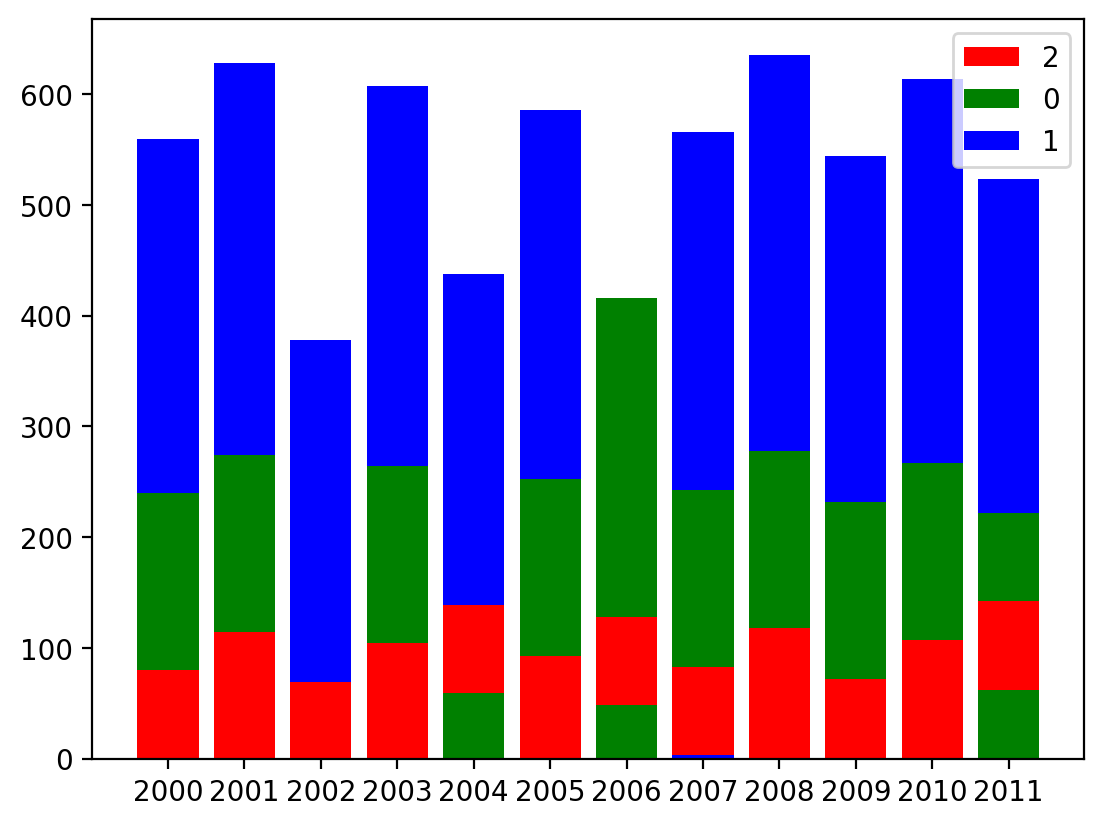

In [338]:
# Set up the figure and axis
fig, ax = plt.subplots()

for y in plotdata:

    bars= [ax.bar(f'{y[0]}',y[1][i][0],color=colourr(y[1][i][1]),bottom=y[1][i-1][0]) for i in range(len(y[1])-1)]
ax.legend('201')
plt.show()

In [1]:
import regimes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from commonyearsdataplot import commonyearsplot
from clustereddf_subsets import clustereddf
import glob
from regimesgroupplot import groupregimesplot
np.random.seed(1)

In [2]:
Forest_list=[]
for file_name in glob.glob('../datasets/Subsets_Forest/'+'*.csv'):
    Forest_list.append(  pd.read_csv(file_name))

#DE_Hai=pd.read_csv(r'../datasets/Subsets/FLX_DE-Hai_FLUXNET2015_SUBSET_DD_2000-2012_1-4.csv')
#AU_Cpr=pd.read_csv(r'../datasets/Subsets/FLX_AU-Cpr_FLUXNET2015_SUBSET_DD_2010-2014_2-4.csv')
#DE_Spw=pd.read_csv(r'../datasets/Subsets/FLX_DE-Spw_FLUXNET2015_SUBSET_DD_2010-2014_1-4.csv')
#IT_Col=pd.read_csv(r'../datasets/Subsets/FLX_IT-Col_FLUXNET2015_SUBSET_DD_1996-2014_1-4.csv')
#ab=pd.read_csv(r'../datasets/Subsets/FLX_AU-Cpr_FLUXNET2015_SUBSET_DD_2010-2014_2-4.csv')
#setting the parameters required
climate=["TA_F","SW_IN_F","LW_IN_F","VPD_F"]#"NETRAD"]
eco=["LE_F_MDS","NEE_VUT_REF","RECO_NT_VUT_REF","GPP_NT_VUT_REF"]

/home/gull/anaconda3/envs/regimesident/lib/python3.11/site-packages/pyriemann/utils/mean.py:522: UserWarning: Convergence not reached
  warnings.warn("Convergence not reached")


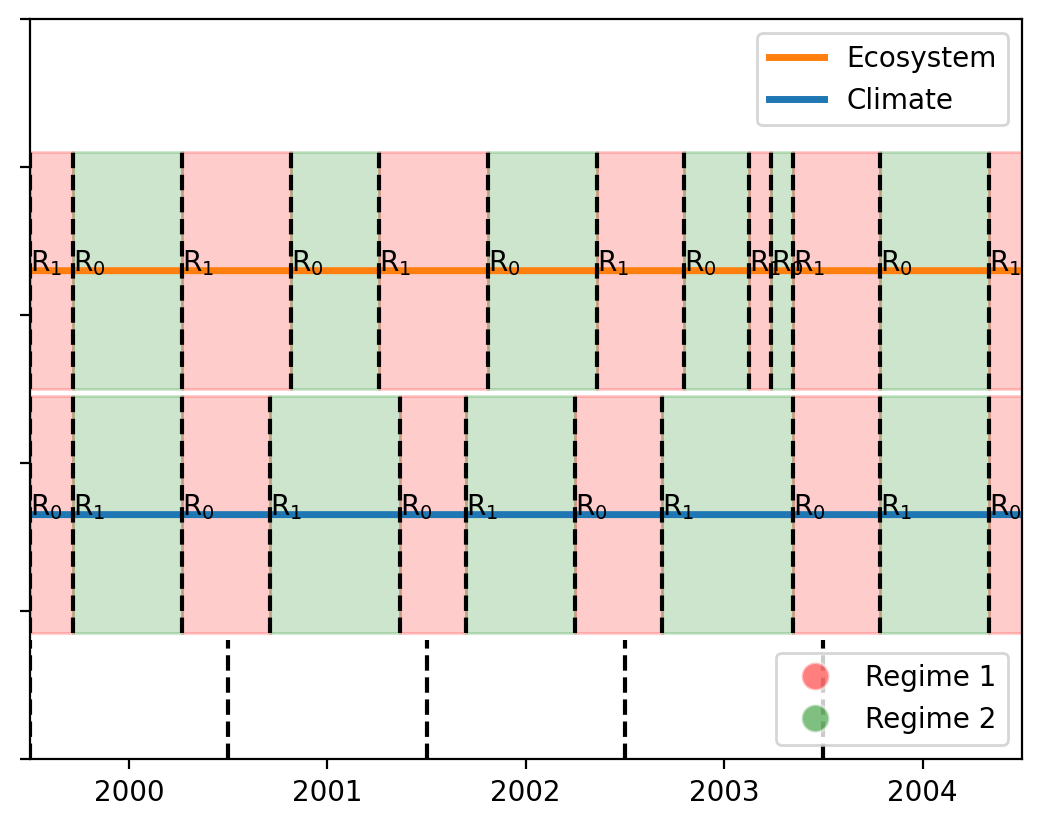

In [4]:
groupregimesplot(Forest_list[1],climate,eco,2,40,5)

In [4]:
#reading of the data for each site
Crop_list=[]
for file_name in glob.glob('../datasets/Subsets_Crop/'+'*.csv'):
    Crop_list.append(  pd.read_csv(file_name))

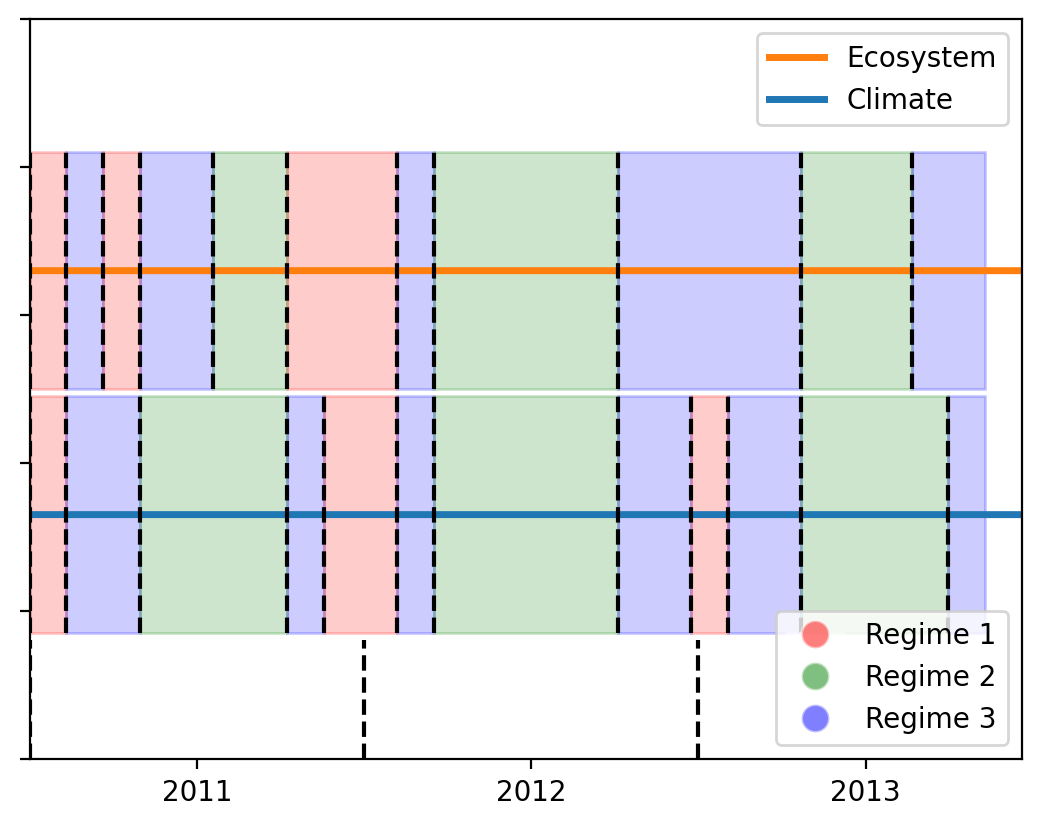

In [7]:
groupregimesplot(Crop_list[1],climate,eco,3,40,5)